In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("regression_data.csv", names=["id", "date", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price"])
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Checking dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [4]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [5]:
df['date'] = pd.to_datetime(df['date']) 

In [6]:
#extracting month and year from the date column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [7]:
df = df.drop(['date', 'id', 'lat', 'long'], axis=1) #dropping date column

In [8]:
df.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
price            0
month            0
year             0
dtype: int64

In [9]:
# Zipcode transformation into categoricals
df['zipcode'] = df['zipcode'].apply(str)
df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
sqft_living15      int64
sqft_lot15         int64
price              int64
month              int64
year               int64
dtype: object

In [10]:
# checking correlations between features and target
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
year             0.003727
month           -0.009928
Name: price, dtype: float64

## EDA

<Axes: xlabel='price', ylabel='Density'>

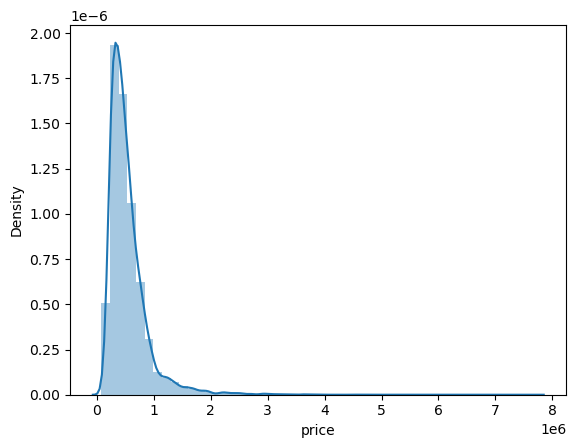

In [11]:
# checking price distribution
sns.distplot(df['price'])

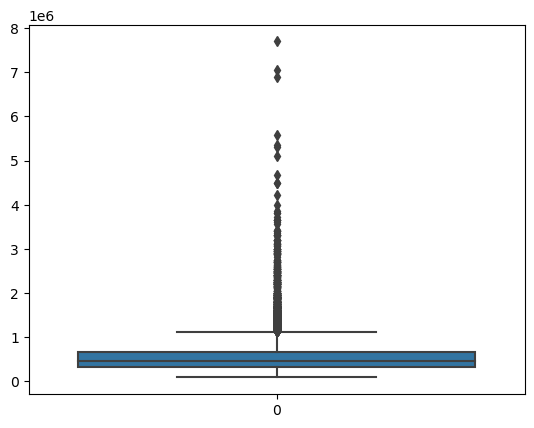

In [12]:
sns.boxplot(df['price'])
plt.show()

In [13]:
#calculating outliers for price
IQR = abs(np.quantile(df["price"], .25) - np.quantile(df["price"], .75)) * 1.5
lower_boundary = np.quantile(df["price"], .25) - IQR
upper_boundary = np.quantile(df["price"], .75) + IQR
lower_boundary, upper_boundary

(-162500.0, 1129500.0)

In [14]:
df[(df["price"] > 1129500) | (df["price"] < -162500)].sort_values("price")

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,year
3101,4,3.00,3180,4649,2.0,0,0,4,9,2070,1110,1925,0,98105,2720,5980,1130000,12,2014
7674,6,4.00,5330,18116,2.0,0,0,3,11,3950,1380,2000,0,98006,4590,16900,1130000,3,2015
2444,5,3.50,3880,13885,2.0,0,3,4,9,2540,1340,1979,0,98006,3690,13885,1130000,6,2014
13280,4,3.50,3170,4000,2.0,0,0,3,10,2340,830,1999,0,98112,1770,4000,1130000,4,2015
1372,3,2.25,2790,13791,1.0,0,3,3,8,2790,0,2006,0,98166,2720,12600,1130000,7,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,4600,21750,5350000,4,2015
4407,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,3560,24345,5570000,8,2014
9245,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,4540,42730,6890000,9,2014
3910,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,3930,25449,7060000,6,2014


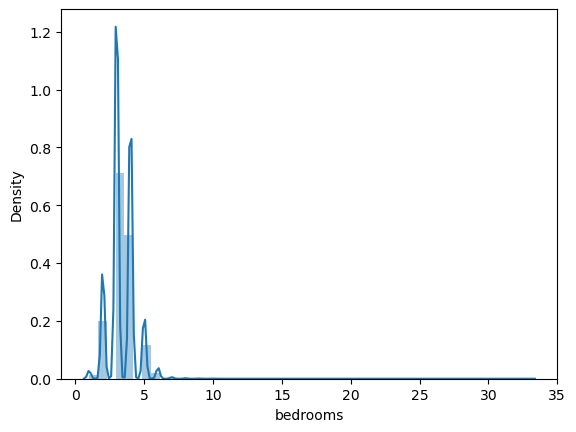

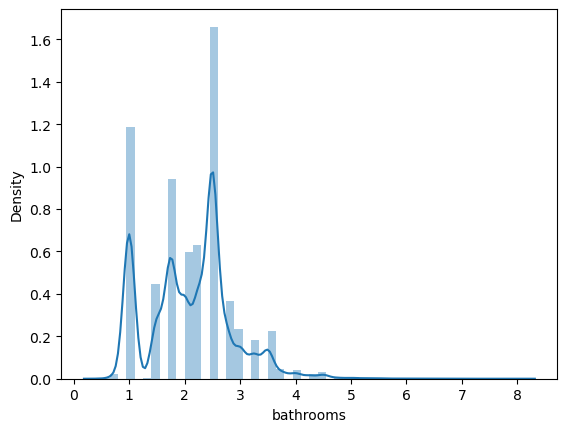

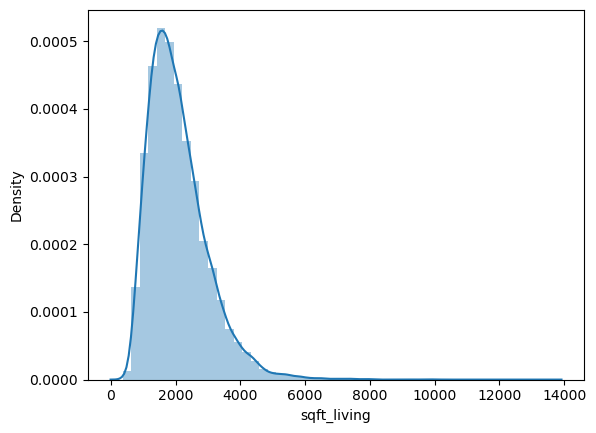

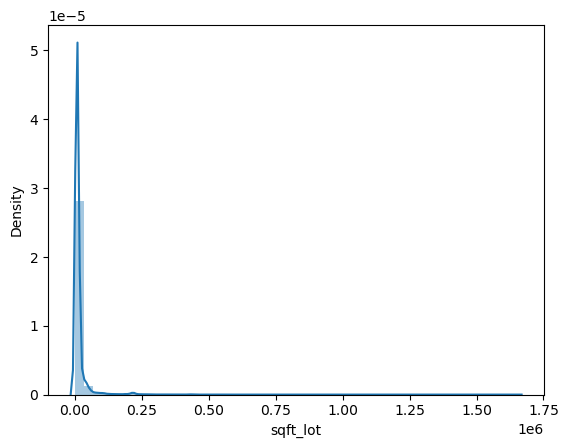

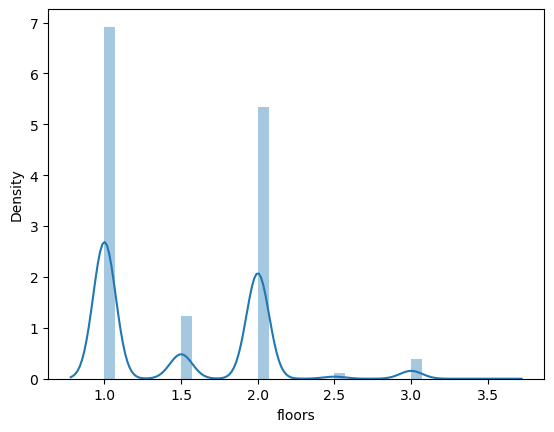

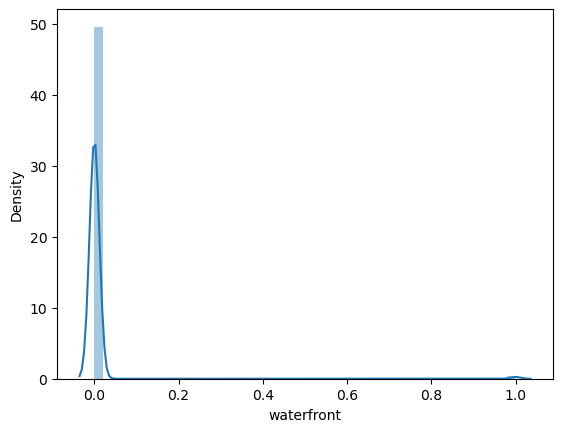

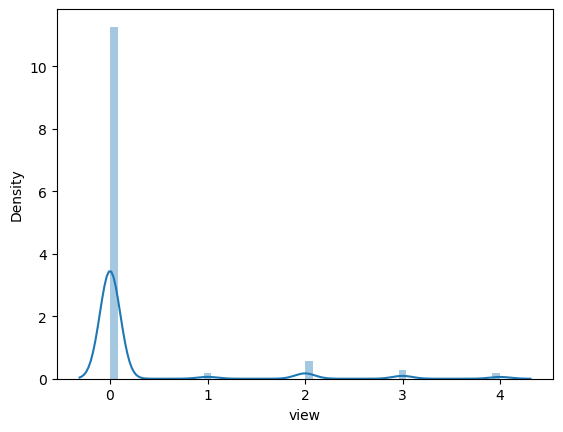

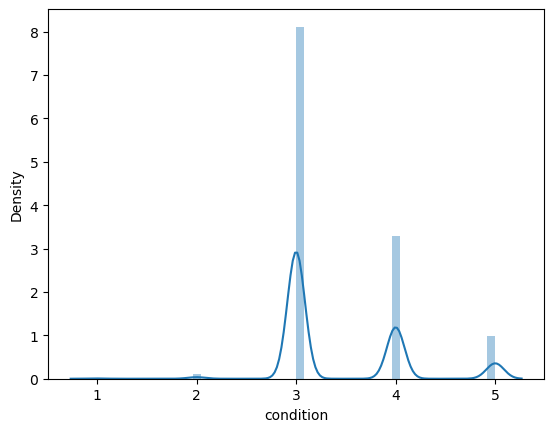

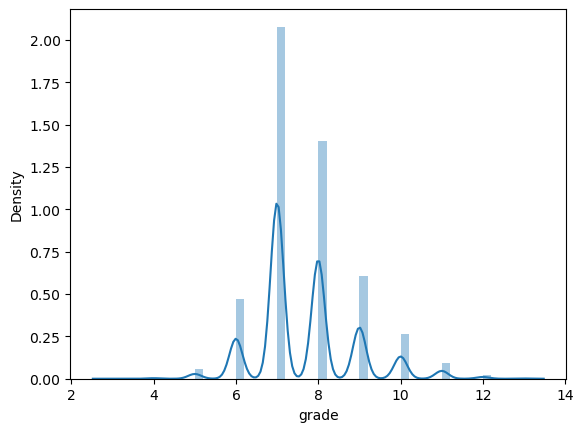

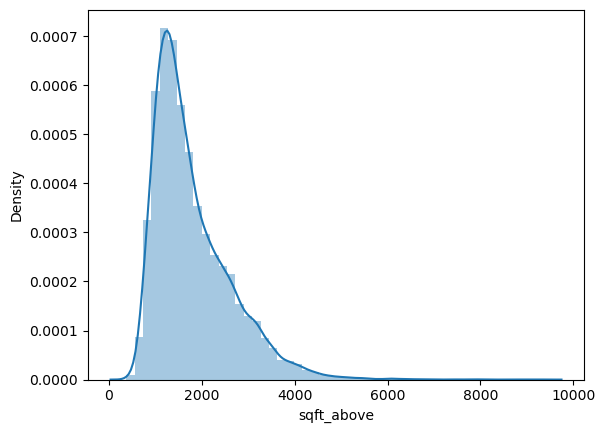

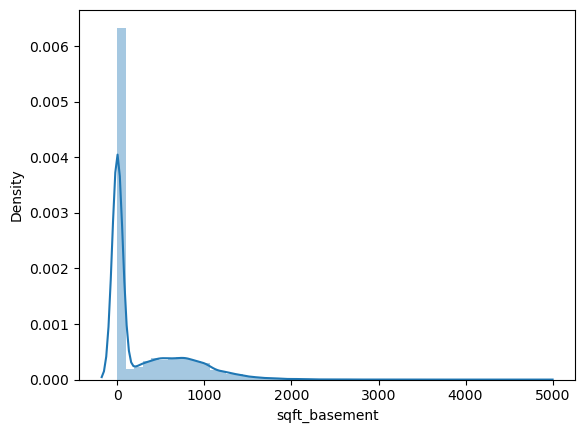

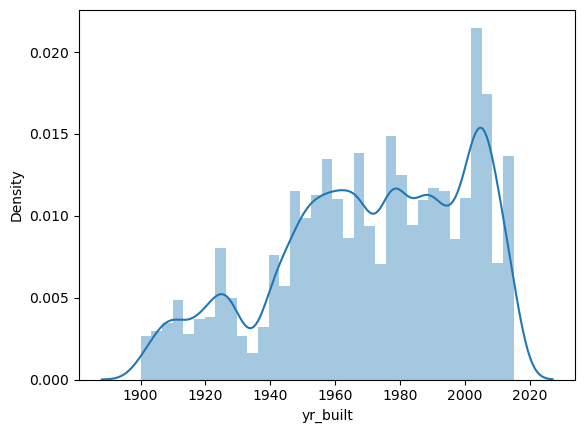

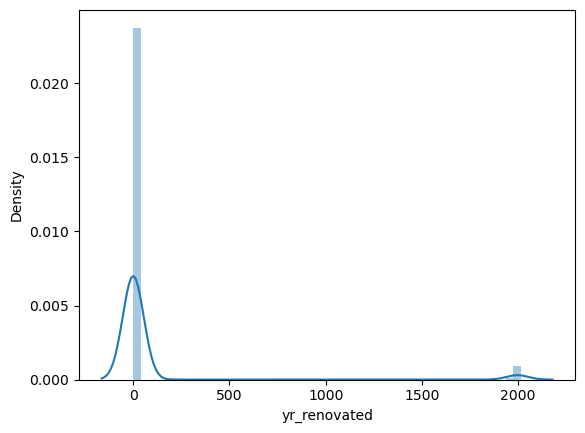

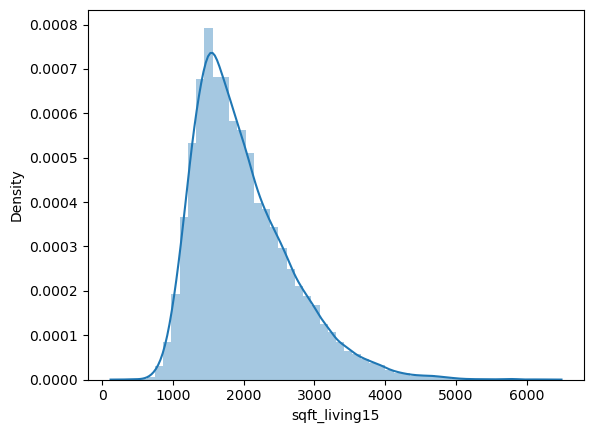

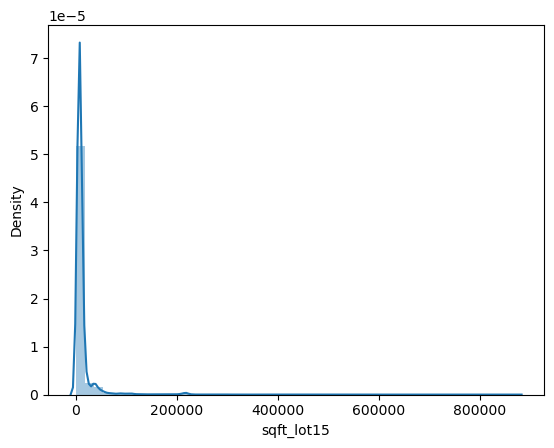

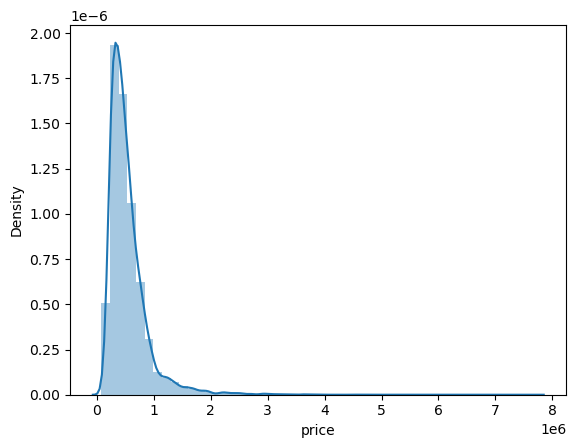

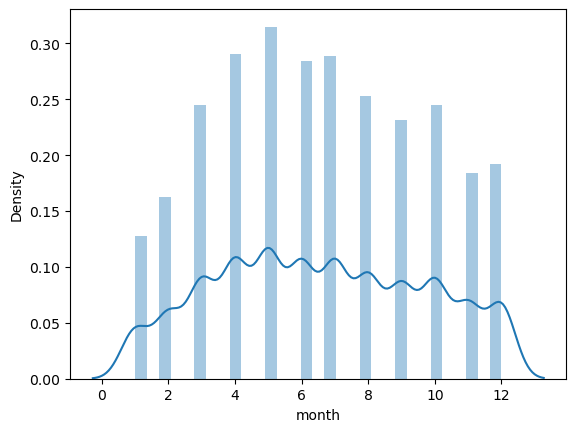

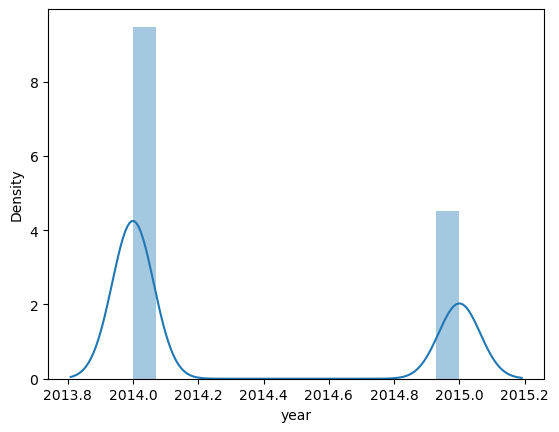

In [15]:
numericals = df.select_dtypes("number")
for col in numericals.columns:
    sns.distplot(numericals[col])
    plt.show()

In [16]:
# encoding the categorical variables
df_final = pd.get_dummies(df, drop_first=True)
df_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,month,year,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900,10,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000,12,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000,2,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000,12,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000,2,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000,5,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000,2,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101,6,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000,1,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Benchmark model 

In [17]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['price'], axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,year,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
753,2,2.50,2380,6600,1.0,0,0,3,8,2380,0,2010,0,1870,6600,8,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1418,4,3.75,3190,17186,2.0,1,4,3,10,3190,0,1999,0,2290,13496,4,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8178,3,2.50,1730,6930,2.0,0,0,3,8,1730,0,1994,0,1780,6930,9,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2254,4,2.00,1870,8750,1.0,0,2,3,7,1870,0,1977,0,1770,8207,11,2014,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4063,8,3.00,2850,12714,1.0,0,0,3,7,2850,0,1959,0,1480,4942,2,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0,0,3,7,2230,0,2004,0,2230,6088,9,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21575,4,2.75,2770,3852,2.0,0,0,3,8,2770,0,2014,0,1810,5641,10,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5390,4,1.50,1530,9000,1.0,0,0,4,6,1530,0,1976,0,1520,8500,7,2014,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,1170,15000,6,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = StandardScaler().fit_transform(X)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
predictions = lm.predict(X_test_scaled)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.8
RMSE: 163971.31020963736
MAE: 95960.16256416366


In [20]:
#model above with outliers

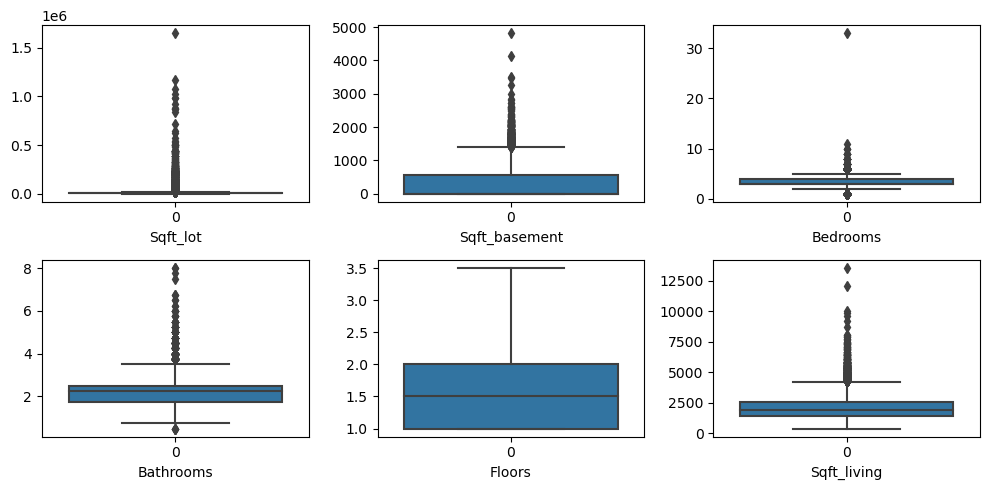

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_final['sqft_lot'], ax = axs[0,0])
plt2 = sns.boxplot(df_final['sqft_basement'], ax = axs[0,1])
plt3 = sns.boxplot(df_final['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df_final['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(df_final['floors'], ax = axs[1,1])
plt6 = sns.boxplot(df_final['sqft_living'], ax = axs[1,2])
plt1.set_xlabel('Sqft_lot')
plt2.set_xlabel('Sqft_basement')
plt3.set_xlabel('Bedrooms')
plt4.set_xlabel('Bathrooms')
plt5.set_xlabel('Floors')
plt6.set_xlabel('Sqft_living')


plt.tight_layout()

In [22]:
#function to remove outliers
def remove_outliers (df, columns):
    df_cleaned = df.copy()
    for col in columns:
        col_values = df_cleaned[col]
        Q1 = col_values.quantile(0.25)
        Q3 = col_values.quantile(0.75)
        IQR = Q3 - Q1
        df_cleaned[col] = col_values[(col_values >= Q1 - 1.5*IQR) & (col_values <= Q3 + 1.5*IQR)]
    return df_cleaned.dropna()

In [23]:
df1 = remove_outliers(df_final, ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement'])

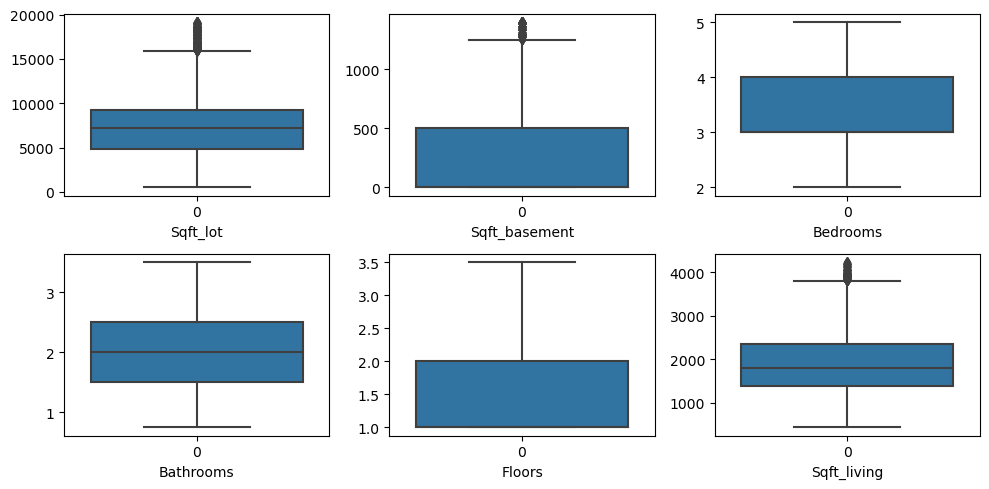

In [24]:
# Data check after removing outliers from features: bedrooms, bathrooms, sqft_living, sqft_lot, sqft_basement, floors
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df1['sqft_lot'], ax = axs[0,0])
plt2 = sns.boxplot(df1['sqft_basement'], ax = axs[0,1])
plt3 = sns.boxplot(df1['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df1['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(df1['floors'], ax = axs[1,1])
plt6 = sns.boxplot(df1['sqft_living'], ax = axs[1,2])
plt1.set_xlabel('Sqft_lot')
plt2.set_xlabel('Sqft_basement')
plt3.set_xlabel('Bedrooms')
plt4.set_xlabel('Bathrooms')
plt5.set_xlabel('Floors')
plt6.set_xlabel('Sqft_living')


plt.tight_layout()

## Model after removing outliers from features

In [25]:
from sklearn.model_selection import train_test_split
X = df1.drop(['price'], axis=1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,year,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
11223,3.0,2.50,2000.0,8057.0,1.0,0,0,3,8,1360,640.0,1998,0,2530,8964,3,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,3.0,2.50,3320.0,11875.0,1.0,0,0,5,10,3320,0.0,1979,0,3730,11875,3,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8953,4.0,2.25,3190.0,11597.0,2.0,0,0,3,10,2300,890.0,1984,0,2990,10679,6,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5727,3.0,2.50,1610.0,1728.0,3.0,0,0,3,8,1610,0.0,2000,0,1540,3090,9,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16166,3.0,2.00,2060.0,4437.0,1.0,0,0,3,7,1030,1030.0,1929,0,1750,4452,6,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628,3.0,2.00,1769.0,9300.0,1.0,0,0,4,7,1769,0.0,1955,2009,1870,10226,6,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14426,2.0,1.00,1120.0,6380.0,1.0,0,0,3,7,1120,0.0,1942,1994,1230,6380,3,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6550,3.0,1.00,1010.0,8906.0,1.0,0,0,5,7,1010,0.0,1968,0,1150,10414,9,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1039,2.0,1.00,1600.0,8961.0,1.0,0,0,4,7,1390,210.0,1949,0,1502,6798,3,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = StandardScaler().fit_transform(X)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
predictions = lm.predict(X_test_scaled)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.82
RMSE: 105409.11608719015
MAE: 71763.21717288063


## Feature selection

In [36]:
df2 = df.copy() #data copy before removing outliers and encoding zipcode

In [37]:
# feature importance 
df2.corr()['price'].sort_values(ascending=False)[:50]

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
year             0.003727
month           -0.009928
Name: price, dtype: float64

In [38]:
#correlation between features
correlations_matrix = df.corr()
correlations_matrix = correlations_matrix[((correlations_matrix > .8) | (correlations_matrix < -.8))]
correlations_matrix.fillna(0)[:20]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,month,year
bedrooms,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bathrooms,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sqft_living,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.876448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
floors,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
waterfront,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grade,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sqft_above,0.0,0.0,0.876448,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


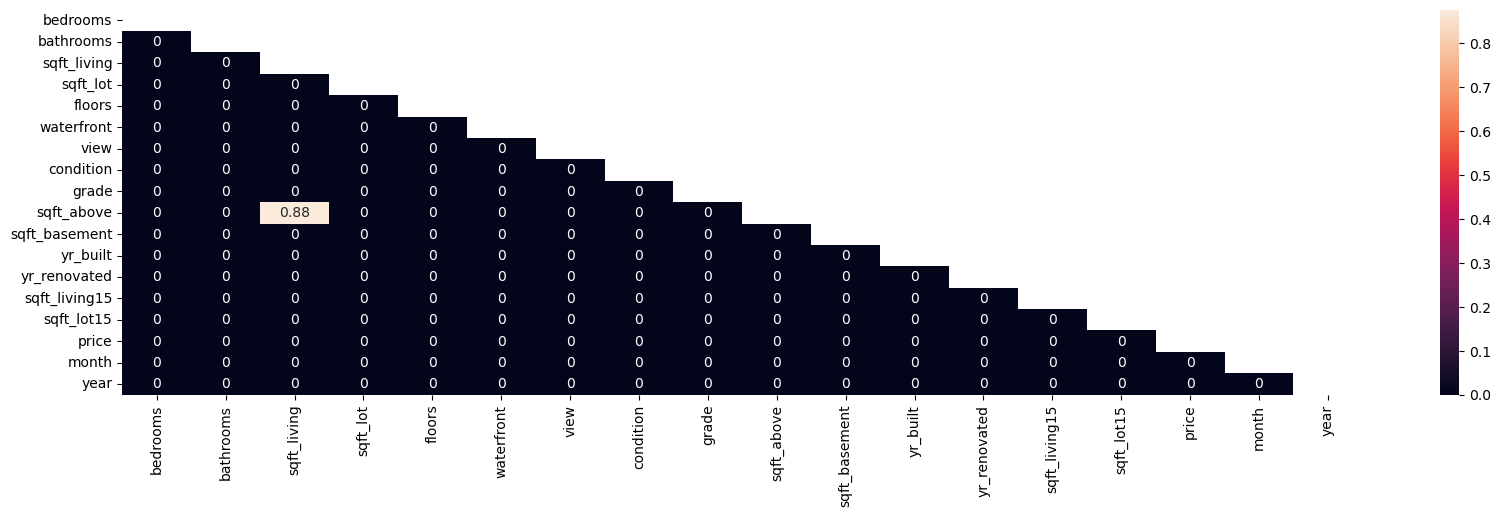

In [39]:
#heatmap
correlations_matrix = correlations_matrix.fillna(0)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [40]:
#nothing to drop, correlations between features are low (the highest between sqft_above and sqft_living is still too low to be removed)

### Variance Inflation Factor 

In [41]:
df3 = df2.copy()
df3['zipcode'] = df3['zipcode'].apply(int)
df3.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
price              int64
month              int64
year               int64
dtype: object

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = add_constant(df3)

threshold = 10

while True:
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    if max(values) > threshold:
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        vif = vif.drop(column_name, axis=1)
    else:
        break
vif

,0
yr_renovated,1.148732
condition,1.254345
waterfront,1.257797
zipcode,1.306755
view,1.443762
bedrooms,1.679894
floors,1.993780
sqft_lot,2.088949
sqft_lot15,2.123561
yr_built,2.463080


,0
yr_renovated,1.148732
condition,1.254345
waterfront,1.257797
zipcode,1.306755
view,1.443762
bedrooms,1.679894
floors,1.993780
sqft_lot,2.088949
sqft_basement,2.120983
sqft_lot15,2.123561


,const,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,year
0,1.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,2014
1,1.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12,2014
2,1.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,2015
3,1.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,2014
4,1.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,5,2014
21593,1.0,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,2,2015
21594,1.0,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,6,2014
21595,1.0,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000,1,2015


In [44]:
[col for col in df3.columns if col not in vif] #checking column we might remove according to VIF analysis

['sqft_living']

### model without Sqft_living

In [45]:
df4 = df_final.drop(['sqft_living'], axis=1) #data copy without sqft_living, zipcode encoded, outliers included

In [46]:
X = df4.drop(['price'], axis=1)
y = df4["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7957257145638397
MAE: 96502.11052991074
RMSE: 163094.56634823995


<Axes: ylabel='price'>

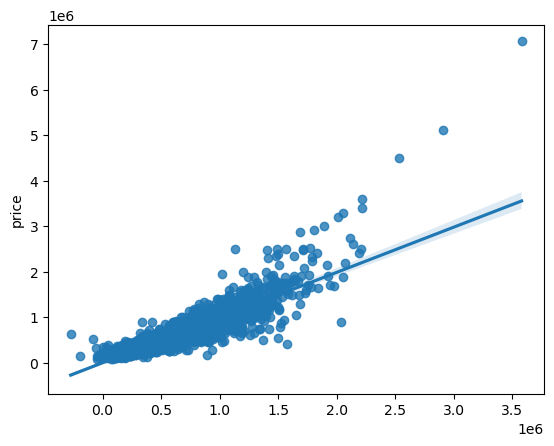

In [47]:
sns.regplot(x=predictions, y=y_test)

### model without Sqft_living and outliers removed

In [48]:
#removing outliers 
df5 = remove_outliers(df4, ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_basement'])

In [49]:
X = df5.drop(['price'], axis=1)
y = df5["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.8244406215897496
MAE: 74380.74498901318
RMSE: 116310.96512195171


<Axes: ylabel='price'>

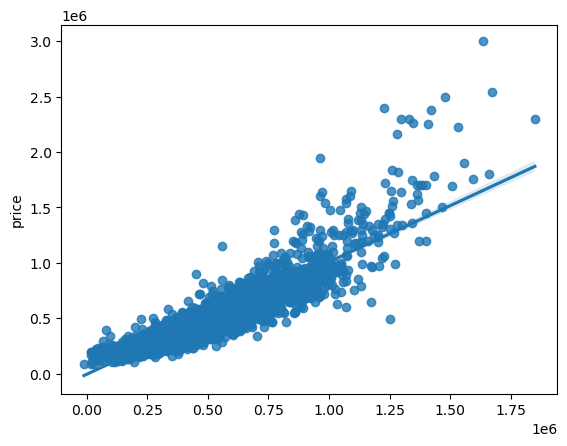

In [50]:
sns.regplot(x=predictions, y=y_test)

After removing outliers from features: bedrooms, bathrooms, sqft_lot and sqft_basement, after treating zipcode as categorical (and encoding it) we get better result. R2 improved and errors are smaller. 

In [58]:
#We can also try applying log transformation on price column in order to decrease the outliers interval
df6 = df5.copy()

In [60]:
df6['price'] = df6['price'].apply(np.log)

<Axes: xlabel='price', ylabel='Density'>

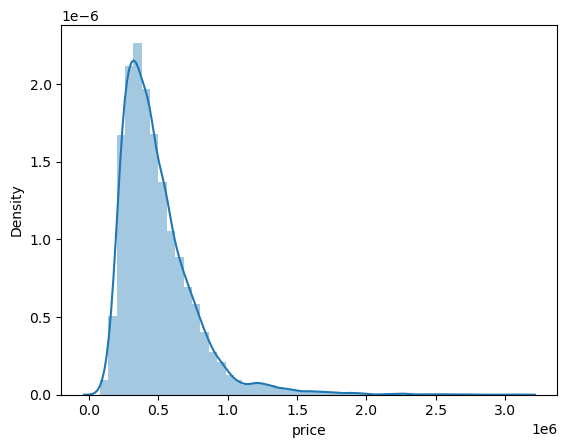

In [62]:
#before scaling: 
sns.distplot(df5['price'])

<Axes: xlabel='price', ylabel='Density'>

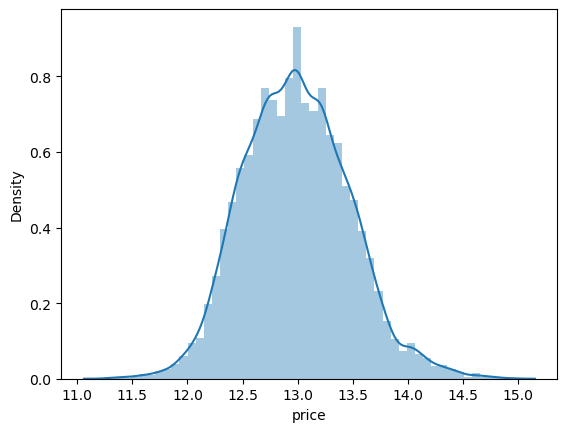

In [61]:
#after scaling: 
sns.distplot(df6['price'])

### model after log scaling the price column

In [63]:
X = df6.drop(['price'], axis=1)
y = df6["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.8824285256735146
MAE: 0.12601282092569785
RMSE: 0.1678735889115568
